# Understanding Flu Vaccine Hesitancy: A Machine Learning Approach for Informed Public Health Intervention


# 1. INTRODUCTION

This project is aimed to provide insights into predicting seasonal flu vaccination status accurately and identifying key factors influencing vaccination decisions. The results from this study could contribute to optimizing pro-vaccination efforts and targeting specific subgroups to maximize the benefits of herd immunity, particularly in the context of seasonal flu.


## 1.1 Business Understanding

We aim to address the following inquiries to enhance our comprehension of the structure surrounding seasonal flu vaccination:

- What are the determinants that impact an individual's decision to opt for the seasonal flu vaccine?
- Among different population segments, which should be the focal point of pro-vaccine campaigns aimed at augmenting the overall annual vaccination uptake?

## 1.2 Problem Statement

Vaccination has greatly improved public health, yet vaccine skepticism is causing immunization rates to decline. This trend prompted research into vaccination attitudes.

Amid this, flu vaccine hesitancy is a major concern, hindering efforts against seasonal flu outbreaks. Despite the flu causing millions of hospitalizations and 52,000 deaths annually, only 51.4% received the vaccine in the 2021-22 season. Hesitancy leads to disease spread, strains healthcare, and may cause co-infections, causing economic burdens and disrupting daily life.

Prompt flu vaccination is crucial, especially during fall and winter when flu and COVID-19 can spread together. It reduces co-infection risk and eases healthcare strain.

Flu vaccine hesitancy is driven by factors like misinformation, safety fears, beliefs, and access. Understanding these helps design effective interventions.

The Ministry of Health assigned us to address flu vaccine hesitancy. Our study uses machine learning to predict flu vaccine likelihood. By analyzing data, we empower experts to understand low vaccination rates and overcome barriers. This bridges the gap between hesitancy and effective interventions, creating a healthier community


# 2. Loading modules

In [1]:
import warnings
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn import tree
from sklearn.svm import SVC
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
pd.set_option('display.max_columns', None)
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,\
confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc, f1_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier,\
GradientBoostingClassifier

# 3. Data Understanding


The data used were obtained from(<a href="https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/#labels"> Here</a>). and contains 36 columns. 

The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.For all binary variables: 0 = No; 1 = Yes.

- `h1n1_concern `- Level of concern about the H1N1 flu.

    0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

- `h1n1_knowledge `- Level of knowledge about H1N1 flu.

    0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

- `behavioral_antiviral_meds` - Has taken antiviral medications. (binary)
- `behavioral_avoidance `- Has avoided close contact with others with flu-like symptoms. (binary)
- `behavioral_face_mask `- Has bought a face mask. (binary)
- `behavioral_wash_hands` - Has frequently washed hands or used hand sanitizer. (binary)
- `behavioral_large_gatherings `- Has reduced time at large gatherings. (binary)
- `behavioral_outside_home `- Has reduced contact with people outside of own household. (binary)
- `behavioral_touch_face `- Has avoided touching eyes, nose, or mouth. (binary)
- `doctor_recc_h1n1 `- H1N1 flu vaccine was recommended by doctor. (binary)
- `doctor_recc_seasonal `- Seasonal flu vaccine was recommended by doctor. (binary)
- `chronic_med_condition `- Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
- `child_under_6_months` - Has regular close contact with a child under the age of six months. (binary)
- `health_worker` - Is a healthcare worker. (binary)
- `health_insurance `- Has health insurance. (binary)
- `opinion_h1n1_vacc_effective` - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- `opinion_h1n1_sick_from_vacc` - Respondent's worry of getting sick from taking H1N1 vaccine.1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- `opinion_seas_vacc_effective` - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- `opinion_seas_sick_from_vacc `- Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

- `age_group `- Age group of respondent.
- `education `- Self-reported education level.
- `race` - Race of respondent.
- `sex `- Sex of respondent.
- `income_poverty `- Household annual income of respondent with respect to 2008 Census poverty thresholds.
- `marital_status `- Marital status of respondent.
- `rent_or_own` - Housing situation of respondent.
- `employment_status `- Employment status of respondent.
- `hhs_geo_region `- Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
- `census_msa `- Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
household_adults - Number of other adults in household, top-coded to 3.
- `household_children` - Number of children in household, top-coded to 3.
- `employment_industry` - Type of industry respondent is employed in. Values are represented as short random character strings.
- `employment_occupation` - Type of occupation of respondent. Values are represented as short random character strings.


In [2]:
training_df = pd.read_csv("data/training_dataset.csv")
training_df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [3]:
target_df = pd.read_csv("data/target_Variables.csv")
target_df

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [4]:
df = pd.concat([training_df, target_df.drop("respondent_id", axis = 1)], axis = 1)
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [5]:
df.shape

(26707, 38)

In [6]:
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [8]:
df.nunique()

respondent_id                  26707
h1n1_concern                       4
h1n1_knowledge                     3
behavioral_antiviral_meds          2
behavioral_avoidance               2
behavioral_face_mask               2
behavioral_wash_hands              2
behavioral_large_gatherings        2
behavioral_outside_home            2
behavioral_touch_face              2
doctor_recc_h1n1                   2
doctor_recc_seasonal               2
chronic_med_condition              2
child_under_6_months               2
health_worker                      2
health_insurance                   2
opinion_h1n1_vacc_effective        5
opinion_h1n1_risk                  5
opinion_h1n1_sick_from_vacc        5
opinion_seas_vacc_effective        5
opinion_seas_risk                  5
opinion_seas_sick_from_vacc        5
age_group                          5
education                          4
race                               4
sex                                2
income_poverty                     3
m

In [9]:
df.value_counts(dropna = False)

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  behavioral_large_gatherings  behavioral_outside_home  behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  chronic_med_condition  child_under_6_months  health_worker  health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  opinion_seas_risk  opinion_seas_sick_from_vacc  age_group      education         race   sex     income_poverty             marital_status  rent_or_own  employment_status   hhs_geo_region  census_msa                household_adults  household_children  employment_industry  employment_occupation  h1n1_vaccine  seasonal_vaccine
0              1.0           0.0             0.0                        0.0                   0.0                   0.0                    0.0                          1.0                      1.0                    0.0              

The variables `hhs_geo_region`, `employment_industry`, and `employment_occupation` are encoded as random strings and correspond to specific geographic regions, industries, and occupations. The CDC has not provided the meanings of these strings to protect the anonymity of respondents. Nonetheless, our model can utilize this information to enhance prediction accuracy. Including these variables in our analysis will allow us to determine their relevance in predicting an individual's likelihood of obtaining a vaccine, even if we cannot establish a direct connection to specific regions or jobs.

# 4. Data Cleaning

## 4.1 Dropping irrelevant columns

In [10]:
df.drop(["h1n1_concern", "h1n1_knowledge", "opinion_h1n1_vacc_effective", "doctor_recc_h1n1", \
         "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc", "h1n1_vaccine"], axis = 1, inplace = True)

## 4.2 Chcking for duplicates

In [11]:
#Checking for duplicates
df.duplicated().any()

False

## 4.3 Checking for any placeholders

In [12]:
# # Convert feature names to strings and remove problematic characters
# df = [str(col).replace('[', '').replace(']', '').replace('<', '') for col in df.columns]
# df

## 4.4 Checking for missing values

In [13]:
# creating a Pandas DataFrame displaying the number of null values for 
# each column in the original DataFrame, 
# as well as the total percent of each column that is made up of null values. 
def check_null(df):
    missing_vals = pd.DataFrame()
    missing_vals['Number of Nulls'] = df.isna().sum()
    missing_vals['% Null'] = (df.isna().sum() / len(df)) * 100
    
    return missing_vals

check_null(df)

,Number of Nulls,% Null
respondent_id,0,0.000000
behavioral_antiviral_meds,71,0.265848
behavioral_avoidance,208,0.778822
behavioral_face_mask,19,0.071142
behavioral_wash_hands,42,0.157262
behavioral_large_gatherings,87,0.325757
behavioral_outside_home,82,0.307036
behavioral_touch_face,128,0.479275
doctor_recc_seasonal,2160,8.087767
chronic_med_condition,971,3.635751


Since the complete dataset contains a significant number of observations (26,707), and most columns have only a small proportion of missing values, any record with missing information in columns containing less than 5% missing values will be excluded. As demonstrated earlier, the affected columns include:

 - `behavioral_antiviral_meds`
 - `behavioral_avoidance`
 - `behavioral_face_mask` 
 - `behavioral_wash_hands`
 - `behavioral_large_gatherings` 
 - `behavioral_outside_home`
 - `behavioral_touch_face` 
 - `chronic_med_condition`
 - `child_under_6_months` 
 - `health_worker` 
 - `opinion_seas_vacc_effective`
 - `opinion_seas_risk` 
 - `opinion_seas_sick_from_vacc` 
 - `household_adults`
 - `household_children`

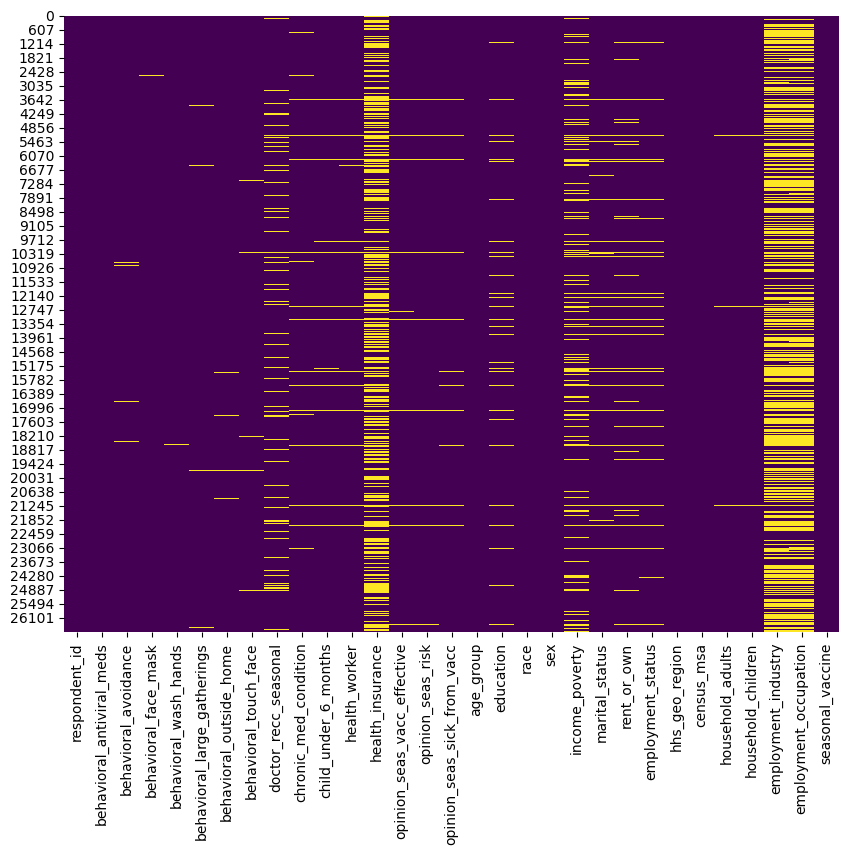

In [14]:
# Assuming 'df' is your DataFrame creating a visualization to understand missing values 
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()


In [15]:
# slice out DataFrame for individuals Not in Labor Force
not_in_labor_force = df[df['employment_status']=='Not in Labor Force']

# display the number and percent of NaN's in each column
display(check_null(not_in_labor_force))

,Number of Nulls,% Null
respondent_id,0,0.000000
behavioral_antiviral_meds,40,0.390969
behavioral_avoidance,104,1.016518
behavioral_face_mask,9,0.087968
behavioral_wash_hands,22,0.215033
behavioral_large_gatherings,46,0.449614
behavioral_outside_home,49,0.478937
behavioral_touch_face,67,0.654872
doctor_recc_seasonal,843,8.239664
chronic_med_condition,91,0.889454


In [16]:
# # slice out DataFrame for 'Unemployed' individuals
unemployed = df[df['employment_status']=='Unemployed']

# # display the number and percent of NaN's in each column
check_null(unemployed)

,Number of Nulls,% Null
respondent_id,0,0.000000
behavioral_antiviral_meds,1,0.068823
behavioral_avoidance,6,0.412939
behavioral_face_mask,1,0.068823
behavioral_wash_hands,0,0.000000
behavioral_large_gatherings,5,0.344116
behavioral_outside_home,2,0.137646
behavioral_touch_face,7,0.481762
doctor_recc_seasonal,94,6.469374
chronic_med_condition,16,1.101170


In [17]:
not_lab_for_ids = list(not_in_labor_force['respondent_id'].index)
unempl_ids = list(unemployed['respondent_id'].index)
all_not_employed_ids = not_lab_for_ids + unempl_ids
len(all_not_employed_ids)

11684

The columns employment_occupation, employment_industry, and health_insurance have the most missing values, at 50.4%, 49.9%, and 46.0% respectively. However, it is important to note that some of these missing values are not due to respondents declining to answer, but rather because they are not applicable. For example, 10,231 respondents who are classified as 'Not in Labor Force' have missing values for employment_occupation and employment_industry. Similarly, 1,453 unemployed respondents have missing values for these columns. In these cases, it is more appropriate to consider employment_occupation and employment_industry as 'not applicable' rather than missing values.

There are also evident patterns in missing values. For example, respondents who declined to answer about one aspect, such as whether their doctor recommended a specific vaccine, often did the same for other related questions. This trend was also observed for questions regarding chronic medical conditions, having a child under 6 months, being a health worker, opinion questions, income, education, personal and home life questions.

These patterns suggest that treating missing information for certain variables as a distinct category rather than dropping it altogether may be more meaningful. This is because it appears to represent a specific type of respondent that constitutes a noteworthy portion of the sample population

In [18]:
# The function accepts a Pandas DataFrame along with a designated column name, 
# and returns a new Pandas DataFrame presenting distinct values within that column, 
# accompanied by their respective occurrence counts. By default, the function also includes a tally of NaN values.
def check_unique(df, col, dropna=False):
    unique_vals = pd.DataFrame(df[col].value_counts(dropna=dropna))
    
    return unique_vals
       
for col in df.columns:
    display(check_unique(df, col))

,respondent_id
0,1
17736,1
17812,1
17811,1
17810,1
...,...
8898,1
8897,1
8896,1
8895,1


,behavioral_antiviral_meds
0.0,25335
1.0,1301
NaN,71


,behavioral_avoidance
1.0,19228
0.0,7271
NaN,208


,behavioral_face_mask
0.0,24847
1.0,1841
NaN,19


,behavioral_wash_hands
1.0,22015
0.0,4650
NaN,42


,behavioral_large_gatherings
0.0,17073
1.0,9547
NaN,87


,behavioral_outside_home
0.0,17644
1.0,8981
NaN,82


,behavioral_touch_face
1.0,18001
0.0,8578
NaN,128


,doctor_recc_seasonal
0.0,16453
1.0,8094
NaN,2160


,chronic_med_condition
0.0,18446
1.0,7290
NaN,971


,child_under_6_months
0.0,23749
1.0,2138
NaN,820


,health_worker
0.0,23004
1.0,2899
NaN,804


,health_insurance
1.0,12697
NaN,12274
0.0,1736


,opinion_seas_vacc_effective
4.0,11629
5.0,9973
2.0,2206
1.0,1221
3.0,1216
NaN,462


,opinion_seas_risk
2.0,8954
4.0,7630
1.0,5974
5.0,2958
3.0,677
NaN,514


,opinion_seas_sick_from_vacc
1.0,11870
2.0,7633
4.0,4852
5.0,1721
NaN,537
3.0,94


,age_group
65+ Years,6843
55 - 64 Years,5563
45 - 54 Years,5238
18 - 34 Years,5215
35 - 44 Years,3848


,education
College Graduate,10097
Some College,7043
12 Years,5797
< 12 Years,2363
NaN,1407


,race
White,21222
Black,2118
Hispanic,1755
Other or Multiple,1612


,sex
Female,15858
Male,10849


,income_poverty
"<= $75,000, Above Poverty",12777
"> $75,000",6810
NaN,4423
Below Poverty,2697


,marital_status
Married,13555
Not Married,11744
NaN,1408


,rent_or_own
Own,18736
Rent,5929
NaN,2042


,employment_status
Employed,13560
Not in Labor Force,10231
NaN,1463
Unemployed,1453


,hhs_geo_region
lzgpxyit,4297
fpwskwrf,3265
qufhixun,3102
oxchjgsf,2859
kbazzjca,2858
bhuqouqj,2846
mlyzmhmf,2243
lrircsnp,2078
atmpeygn,2033
dqpwygqj,1126


,census_msa
"MSA, Not Principle City",11645
"MSA, Principle City",7864
Non-MSA,7198


,household_adults
1.0,14474
0.0,8056
2.0,2803
3.0,1125
NaN,249


,household_children
0.0,18672
1.0,3175
2.0,2864
3.0,1747
NaN,249


,employment_industry
NaN,13330
fcxhlnwr,2468
wxleyezf,1804
ldnlellj,1231
pxcmvdjn,1037
atmlpfrs,926
arjwrbjb,871
xicduogh,851
mfikgejo,614
vjjrobsf,527


,employment_occupation
NaN,13470
xtkaffoo,1778
mxkfnird,1509
emcorrxb,1270
cmhcxjea,1247
xgwztkwe,1082
hfxkjkmi,766
qxajmpny,548
xqwwgdyp,485
kldqjyjy,469


,seasonal_vaccine
0,14272
1,12435


In [19]:
# if a person is unemployed, change their 'employment_industry' to 'not_employed'
df.loc[df['employment_status'] == 'Unemployed', 'employment_industry'] = 'not employed'

# if a person is not in the labor force, change their 'employment_industry' to 'not_employed'
df.loc[df['employment_status'] == 'Not in Labor Force', 'employment_industry'] = 'not employed'
check_unique(df, 'employment_industry') 

,employment_industry
not employed,11684
fcxhlnwr,2468
wxleyezf,1804
NaN,1646
ldnlellj,1231
pxcmvdjn,1037
atmlpfrs,926
arjwrbjb,871
xicduogh,851
mfikgejo,614


In [20]:
# if a person is unemployed, change their 'employment_occupation' to 'not_employed'
df.loc[df['employment_status'] == 'Unemployed', 'employment_occupation'] = 'not employed'

# if a person is not in the labor force, change their 'employment_occupation' to 'not_employed'
df.loc[df['employment_status'] == 'Not in Labor Force', 'employment_occupation'] = 'not employed'
check_unique(df, 'employment_occupation')

,employment_occupation
not employed,11684
NaN,1786
xtkaffoo,1778
mxkfnird,1509
emcorrxb,1270
cmhcxjea,1247
xgwztkwe,1082
hfxkjkmi,766
qxajmpny,548
xqwwgdyp,485


Dropping records if they are missing information in any column comprised of less than 5% missing values.

In [21]:
# create a DataFrame to show columns with % Null between 0 and 5%
null_df = check_null(df)
null_df.drop(index=null_df.loc[null_df['% Null']==0].index, axis=0, inplace=True)
under_5_null = null_df.loc[null_df['% Null']<5]
under_5_null

,Number of Nulls,% Null
behavioral_antiviral_meds,71,0.265848
behavioral_avoidance,208,0.778822
behavioral_face_mask,19,0.071142
behavioral_wash_hands,42,0.157262
behavioral_large_gatherings,87,0.325757
behavioral_outside_home,82,0.307036
behavioral_touch_face,128,0.479275
chronic_med_condition,971,3.635751
child_under_6_months,820,3.070356
health_worker,804,3.010447


In [22]:
# drop records with null values for the above columns, composed of less than 5% null values
under_5_null_cols = list(under_5_null.index)
df.dropna(subset=under_5_null_cols, inplace=True)

# check out the resulting df
display(check_null(df))
df.shape

,Number of Nulls,% Null
respondent_id,0,0.000000
behavioral_antiviral_meds,0,0.000000
behavioral_avoidance,0,0.000000
behavioral_face_mask,0,0.000000
behavioral_wash_hands,0,0.000000
behavioral_large_gatherings,0,0.000000
behavioral_outside_home,0,0.000000
behavioral_touch_face,0,0.000000
doctor_recc_seasonal,1856,7.416287
chronic_med_condition,0,0.000000


(25026, 31)

For the health_insurance and income_poverty variables, it is reasonable to create a new category for missing values, since these are relatively common. This will allow us to keep all of the data, while still being able to distinguish between respondents who did not answer and those who do not have health insurance or are in poverty.

For the categorical variables education, marital_status, rent_to_own, employment_status, employment_industry, and employment_occupation, it is also reasonable to create a new category for missing values. The pattern of missing values is very similar for these variables, and dropping records with missing values would result in a significant loss of data. Creating a new category for missing values will allow us to keep all of the data, while still being able to distinguish between respondents who did not answer and those who belong to a specific category.

For the doctor_recc_seasonal variable, the pattern of missing values is different from the other categorical variables. In this case, it is probably best to replace the missing values with the string missing. This will allow us to keep the data, while still being able to distinguish between respondents who did not answer and those who did not receive a recommendation from their doctor for a seasonal flu vaccine.

The dataset is a good representation of the general population in terms of vaccination status and gender. However, there is a significant underrepresentation of people of color, and a high percentage of respondents who declined to answer the health insurance question. This is important to keep in mind when interpreting the results of any analysis.

# 5. Feature Engineering

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25026 entries, 0 to 26706
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                25026 non-null  int64  
 1   behavioral_antiviral_meds    25026 non-null  float64
 2   behavioral_avoidance         25026 non-null  float64
 3   behavioral_face_mask         25026 non-null  float64
 4   behavioral_wash_hands        25026 non-null  float64
 5   behavioral_large_gatherings  25026 non-null  float64
 6   behavioral_outside_home      25026 non-null  float64
 7   behavioral_touch_face        25026 non-null  float64
 8   doctor_recc_seasonal         23170 non-null  float64
 9   chronic_med_condition        25026 non-null  float64
 10  child_under_6_months         25026 non-null  float64
 11  health_worker                25026 non-null  float64
 12  health_insurance             13953 non-null  float64
 13  opinion_seas_vac

Let's create a new variable  that represents an individual's behavioral efforts to avoid the flu, excluding vaccination. We will sum up all binary columns, where a value of 1 indicates a behavior that reduces the risk of contracting the flu. A higher flu_avoidance_score will indicate a more careful and flu-conscious individual.

In [24]:
#grouping all columns with behavioral characteristics
behavior_cols = [col for col in df.columns if 'behavioral' in col]
behavior_cols

['behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face']

,behav_score
3.0,6856
5.0,4306
2.0,4272
4.0,4066
1.0,2458
0.0,1942
6.0,973
7.0,153


<Figure size 700x500 with 0 Axes>

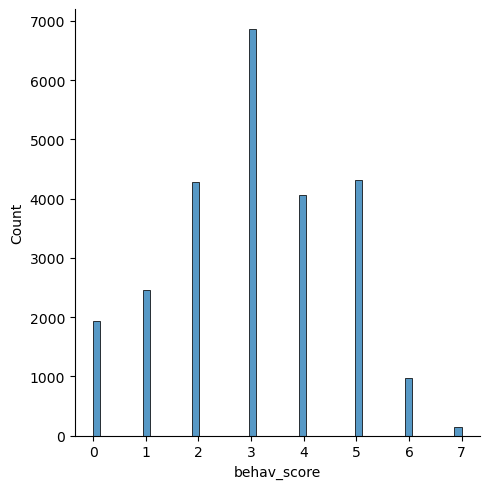

In [25]:
# In a Df and specific column name and returns a Pandas DataFrame 
# displaying the unique values in that column as well as the count of each unique value. 
# Also displays a histogram (Seaborn distplot) showing the distribution of the column values.
def check_col_distr(df, col):    
    ## check counts of unique values in col
    display(check_unique(df, col))
     ## plot distribution of col
    plt.figure(figsize=(7,5))
    fig = sns.displot(df[col])
    
    return fig
       
df['behav_score'] = df[behavior_cols].sum(axis=1)
check_col_distr(df, 'behav_score');

Create a variable that represents the ratio of how much an individual has done behaviorally to avoid the flu (aside from getting vaccinated) to their perception of the risk of getting the flu without the vaccine.

The numerator of the ratio is behav_score + 1, which ranges from 1 to 7. This is to differentiate among individuals who are not taking any action to avoid the flu, but differ in the degree to which they are concerned about getting sick without the vaccine. An individual with a score of 1 has done nothing to avoid the flu but is very concerned about getting sick without the vaccine. An individual with a score of 7 has done everything they can to avoid the flu and is not very concerned about getting sick without the vaccine.

The denominator of the ratio is the rating of risk perception, opinion_seas_risk, which ranges from 1 to 5. This represents the individual's perception of the risk of getting the flu without the vaccine. An individual with a score of 1 believes that the risk of getting the flu without the vaccine is very low. An individual with a score of 5 believes that the risk of getting the flu without the vaccine is very high.

The flu_avoidance_behavior_to_risk_ratio variable can be used to understand how an individual's behavioral risk avoidance and risk perception relate to their likelihood of getting the flu vaccine. An individual with a low flu_avoidance_behavior_to_risk_ratio is more likely to get the flu vaccine, as they are both concerned about getting sick and have not taken many steps to avoid the flu. An individual with a high flu_avoidance_behavior_to_risk_ratio is less likely to get the flu vaccine, as they are not very concerned about getting sick and have taken many steps to avoid the flu.

,behav_to_risk
1.000000,4664
2.000000,3398
1.500000,3130
3.000000,2268
4.000000,1362
1.250000,1352
2.500000,1284
0.500000,1208
0.750000,1155
6.000000,811


<Figure size 700x500 with 0 Axes>

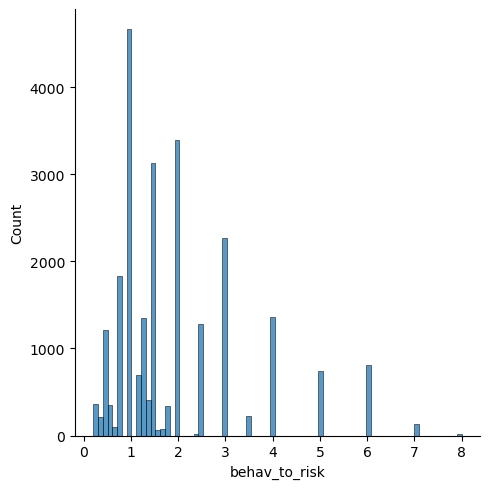

In [26]:
df['behav_to_risk'] = (df['behav_score'] + 1) / df['opinion_seas_risk']

# check counts of unique values in new col and plot distribution
check_col_distr(df, 'behav_to_risk');

Creating a variable for whether or not an individual is 65 years or older as this represents a group at higher risk for serious complications from the flu.

,older_65
0,18719
1,6307


<Figure size 700x500 with 0 Axes>

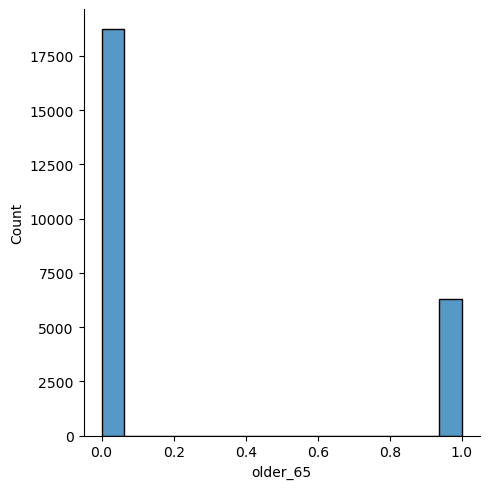

In [27]:
def is_older_65(row):
    if row['age_group'] == '65+ Years':
        return 1
    else:
        return 0

# apply the function to create new column
df['older_65'] = df.apply(lambda x: is_older_65(x), axis=1)

##check counts of unique values in new col and plot distribution
check_col_distr(df, 'older_65');

Define a variable to represent an individual's overall risk of developing flu-related complications. This risk is influenced by certain factors that make some individuals more susceptible to severe flu outcomes. Those at higher risk include:

1. Individuals aged **65 years and older**.
2. **Children 6 months or younger**, as well as people in close contact with a child under 6 months, since they share an increased risk.
3. People with **chronic medical conditions**, such as asthma, other lung conditions, diabetes, heart conditions, kidney conditions, sickle cell anemia or other anemia, neurological or neuromuscular conditions, liver conditions, or weakened immune systems.

The variable serves to acknowledge the heightened vulnerability of these groups to flu-related complications, providing valuable information for public health assessments and interventions.
(<a href="https://www.cdc.gov/flu/highrisk/index.htm"> CDC - "People at High Risk for Flu Complications"</a>).

,high_risk_compl
0,12916
1,8897
2,3072
3,141


<Figure size 700x500 with 0 Axes>

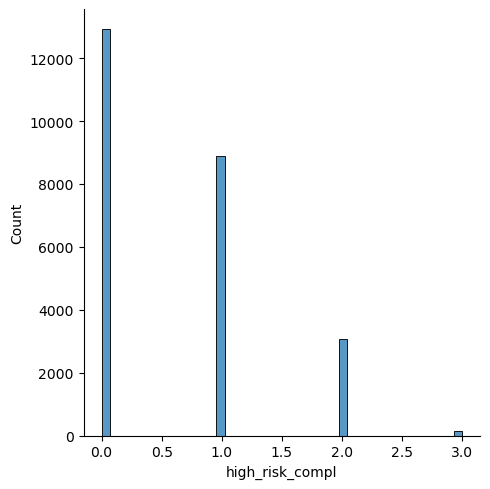

In [28]:
# define a function to calculate score for high risk of complications
def calc_high_risk(row):
    risk = 0
    if row['older_65'] == 1:
        risk += 1
    if row['child_under_6_months'] == 1:
        risk += 1
    if row['chronic_med_condition'] == 1:
        risk += 1
    return risk

## apply the function to create new column
df['high_risk_compl'] = df.apply(lambda x: calc_high_risk(x), axis=1)

## check counts of unique values in new col and plot distribution
check_col_distr(df, 'high_risk_compl');

Creating a categorical variable that groups persons with numerous high risk characteristics ('high_risk_compl' > 1) into one 'high risk' category, assigning a value of 0 to 'low risk' and a value of 1 to'med risk'.

In [29]:
df['high_risk_cat'] = df['high_risk_compl'].map({0:'low risk', 1:'med risk',
                                                 2:'high risk', 3:'high risk'})

## check counts of unique values in new col
df['high_risk_cat'].value_counts()

low risk     12916
med risk      8897
high risk     3213
Name: high_risk_cat, dtype: int64

In [30]:
df.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine,behav_score,behav_to_risk,older_65,high_risk_compl,high_risk_cat
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,not employed,not employed,0,2.0,3.0,0,0,low risk
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,4.0,2.5,0,0,low risk
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,NaN,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,1.0,2.0,0,1,med risk
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,not employed,not employed,1,3.0,1.0,1,2,high risk
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,4.0,5.0,0,0,low risk


### Preprocessing

In [31]:
# change binary variable from floats to strings without altering NaN values
#(NaN will be automatically filled with 'missing' during preprocessing)
df['doctor_recc_seasonal'] = df['doctor_recc_seasonal'].map({1.0: '1', 0.0: '0'})
df['doctor_recc_seasonal'].value_counts(dropna=False)

0      15494
1       7676
NaN     1856
Name: doctor_recc_seasonal, dtype: int64

In [32]:
df['health_insurance'] = df['health_insurance'].map({1.0: '1', 0.0: '0'})
df['health_insurance'].value_counts(dropna=False)

1      12265
NaN    11073
0       1688
Name: health_insurance, dtype: int64

In [33]:
# since they're so underrepresented in the dataset, 
 # we create a function to return make combine people of color into one category 

def race_func(row):
    if row['race'] == 'White':
        return 'White'
    else:
        return 'POC'

# apply the function to create new column
df['race'] = df.apply(lambda x: race_func(x), axis=1)

# check counts of unique values in new col and plot distribution
df['race'].value_counts(dropna=False)

White    19920
POC       5106
Name: race, dtype: int64

In [34]:
 # A list of intermediate engineered features that will be highly correlated
# with other features
feats_to_drop = ['older_65', 'high_risk_compl']

# Drop those features from the DataFrame
for feat in feats_to_drop:
    if feat in df.columns:
        df.drop(columns=feat, inplace=True)


Need to process numerical and categorical variables differently, but right now some categorical variables are still showing up as numeric because NaNs haven't been filled in with 'missing' (this will be done as part of preprocessing pipeline)

In [35]:
null_df = check_null(df)
miss_val_cols = list(null_df.loc[null_df['% Null']>0].index)
miss_val_cols

['doctor_recc_seasonal',
 'health_insurance',
 'education',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'employment_industry',
 'employment_occupation']

In [36]:
# list of all columns that are currently object dtype
obj_cols = list(df.select_dtypes('O').columns)
# add to that list the columns with missing values that will become categorical when 'missing' imputed
 # use set() so no column appears twice in the list since there's some overlap
cat_cols = list(set(obj_cols + miss_val_cols))
cat_cols

['high_risk_cat',
 'race',
 'doctor_recc_seasonal',
 'sex',
 'census_msa',
 'education',
 'health_insurance',
 'employment_industry',
 'rent_or_own',
 'hhs_geo_region',
 'income_poverty',
 'employment_status',
 'age_group',
 'employment_occupation',
 'marital_status']

All the above need to have null values filled with 'missing' so they will all be categorical if they aren't already

In [37]:
# columns to be treated as numeric in pipeline are all the remaining cols in X 
# that are not in cat_cols
num_cols = [col for col in df.drop('seasonal_vaccine', axis=1).columns if col not in cat_cols]
num_cols

['respondent_id',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'behav_score',
 'behav_to_risk']

### Train test split

In [38]:
# define target variable
target = 'seasonal_vaccine'

# separate of features (X) and target (y) for train-test-split
X = df.drop(columns=target, axis=1).copy()
y = df[target].copy()

# define random seed to use for train test split and later for classifiers for reproducibility
random_seed = 319

## split the data into training and test sets prior to preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_seed)

# check for class imbalance across all sets of y
print('**original**\n', y.value_counts(normalize=True), '\n------\n')
print('**y_train**\n', y_train.value_counts(normalize=True), '\n------\n')
print('**y_test**\n', y_test.value_counts(normalize=True), '\n------\n')

**original**
 0    0.531927
1    0.468073
Name: seasonal_vaccine, dtype: float64 
------

**y_train**
 0    0.531169
1    0.468831
Name: seasonal_vaccine, dtype: float64 
------

**y_test**
 0    0.534958
1    0.465042
Name: seasonal_vaccine, dtype: float64 
------



In [39]:
# Impute and scale numerical features
num_imputer = SimpleImputer(strategy='mean')
X_train_num = num_imputer.fit_transform(X_train[num_cols])
X_test_num = num_imputer.transform(X_test[num_cols])

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [40]:
# Impute and encode categorical features
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
X_train_cat = cat_imputer.fit_transform(X_train[cat_cols])
X_test_cat = cat_imputer.transform(X_test[cat_cols])

encoder = OneHotEncoder(handle_unknown='error', sparse=False, drop='if_binary')
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

# Combine transformed numerical and categorical data
X_train_combined = np.concatenate((X_train_num, X_train_cat_encoded), axis=1)
X_test_combined = np.concatenate((X_test_num, X_test_cat_encoded), axis=1)


In [41]:
# Get feature names
num_feature_names = num_cols
cat_feature_names = encoder.get_feature_names_out(input_features=cat_cols)
feature_names = np.concatenate((num_feature_names, cat_feature_names))

print(feature_names)
print(len(feature_names))

['respondent_id' 'behavioral_antiviral_meds' 'behavioral_avoidance'
 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'chronic_med_condition' 'child_under_6_months'
 'health_worker' 'opinion_seas_vacc_effective' 'opinion_seas_risk'
 'opinion_seas_sick_from_vacc' 'household_adults' 'household_children'
 'behav_score' 'behav_to_risk' 'high_risk_cat_high risk'
 'high_risk_cat_low risk' 'high_risk_cat_med risk' 'race_White'
 'doctor_recc_seasonal_0' 'doctor_recc_seasonal_1'
 'doctor_recc_seasonal_missing' 'sex_Male'
 'census_msa_MSA, Not Principle  City' 'census_msa_MSA, Principle City'
 'census_msa_Non-MSA' 'education_12 Years' 'education_< 12 Years'
 'education_College Graduate' 'education_Some College' 'education_missing'
 'health_insurance_0' 'health_insurance_1' 'health_insurance_missing'
 'employment_industry_arjwrbjb' 'employment_industry_atmlpfrs'
 'employment_industry_cfqqtusy' 'employment_industry_dot

In [42]:
# Create preprocessed DataFrames
preprocessed_train_df = pd.DataFrame(X_train_combined, columns=feature_names)
preprocessed_test_df = pd.DataFrame(X_test_combined, columns=feature_names)

# Display preprocessed DataFrames
print(preprocessed_train_df)
print(preprocessed_test_df)


       respondent_id  behavioral_antiviral_meds  behavioral_avoidance  \
0            20575.0                        0.0                   0.0   
1             9544.0                        0.0                   1.0   
2            12607.0                        0.0                   1.0   
3             8067.0                        0.0                   0.0   
4            23863.0                        0.0                   1.0   
...              ...                        ...                   ...   
20015        16505.0                        0.0                   1.0   
20016           89.0                        0.0                   0.0   
20017         6651.0                        0.0                   1.0   
20018        16084.0                        0.0                   1.0   
20019         4124.0                        1.0                   1.0   

       behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                    1.0   
1              

In [43]:
preprocessed_train_df.info()
preprocessed_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20020 entries, 0 to 20019
Columns: 114 entries, respondent_id to marital_status_missing
dtypes: float64(114)
memory usage: 17.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5006 entries, 0 to 5005
Columns: 114 entries, respondent_id to marital_status_missing
dtypes: float64(114)
memory usage: 4.4 MB


# 6. Univariate, Bivariate, Multivariate analysis

In [44]:
# summary statistics for columns
df.describe()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,seasonal_vaccine,behav_score,behav_to_risk
count,25026.000000,25026.000000,25026.000000,25026.000000,25026.00000,25026.000000,25026.000000,25026.000000,25026.000000,25026.000000,25026.000000,25026.000000,25026.000000,25026.000000,25026.000000,25026.000000,25026.000000,25026.00000,25026.000000
mean,13356.572325,0.048030,0.729721,0.067889,0.82726,0.358068,0.336130,0.680652,0.282786,0.083114,0.113042,4.033925,2.727763,2.116239,0.893990,0.540678,0.468073,3.04775,1.937162
std,7710.217966,0.213834,0.444113,0.251561,0.37803,0.479442,0.472394,0.466233,0.450362,0.276059,0.316651,1.081203,1.386682,1.332284,0.752266,0.931824,0.498990,1.59945,1.372824
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.200000
25%,6682.250000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.00000,1.000000
50%,13366.500000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,3.00000,1.500000
75%,20026.750000,0.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,4.000000,1.000000,1.000000,1.000000,4.00000,2.500000
max,26706.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,7.00000,8.000000


Analysis of the dataset reveals trends through both summary statistics (above) and distributions of variables (below):

- **Target variable - `seasonal_vaccine`:** The sample population is nearly evenly divided, with 46.9% of participants having received the seasonal flu vaccine and 53.1% abstaining from vaccination in the survey year (2009).

- **Independent variables:**
    - Respondents mostly opted for less extreme preventive measures against the seasonal flu, like avoiding close contact with symptomatic individuals (`behavioral_avoidance` - 73% of participants), practicing frequent handwashing (`behavioral_wash_hands` - 83%), and, to a slightly lesser degree, refraining from touching their faces (`behavioral_touch_face` - 68%).
    - More intense preventive measures were less commonly embraced, such as acquiring and wearing face masks (`behavioral_face_mask` - 7%), avoiding large gatherings (`behavioral_large_gatherings` - 36%), and reducing interactions with people beyond their households (`behavioral_outside_home` - 34%).
    - Around 28% of respondents had chronic medical conditions (`chronic_med_condition`) that placed them at higher risk for flu-related complications.
    - The majority of respondents perceived the flu vaccine to possess at least some level of effectiveness (`opinion_seas_vacc_effective`) in safeguarding against the flu (average rating ~4: somewhat effective).
    - The sample population held mixed opinions regarding their susceptibility to flu contraction without the vaccine (`opinion_seas_risk`), with only a small number expressing no viewpoint on their risk.
    - Health workers constituted 11% of the sample population (`health_worker`).

# 7. Data Modelling

## 7.1 Logistic Regression

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25026 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                25026 non-null  int64  
 1   behavioral_antiviral_meds    25026 non-null  float64
 2   behavioral_avoidance         25026 non-null  float64
 3   behavioral_face_mask         25026 non-null  float64
 4   behavioral_wash_hands        25026 non-null  float64
 5   behavioral_large_gatherings  25026 non-null  float64
 6   behavioral_outside_home      25026 non-null  float64
 7   behavioral_touch_face        25026 non-null  float64
 8   doctor_recc_seasonal         23170 non-null  object 
 9   chronic_med_condition        25026 non-null  float64
 10  child_under_6_months         25026 non-null  float64
 11  health_worker                25026 non-null  float64
 12  health_insurance             13953 non-null  object 
 13  opinion_seas_vac

In [46]:
categorical_columns = ['doctor_recc_seasonal', 'health_insurance', 'age_group', 'education', 'race', 'sex',\
                       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', \
                       'census_msa', 'employment_industry', 'employment_occupation', 'high_risk_cat']

In [47]:
# Applying preprocessing
for col in categorical_columns:
    X_train[col] = X_train[col].fillna('Missing')  # Fill missing values
    X_train[col] = X_train[col].astype('category').cat.codes
    X_test[col] = X_test[col].fillna('Missing')  # Fill missing values
    X_test[col] = X_test[col].astype('category').cat.codes

X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0  # Add missing columns with zeros

# Create a Logistic Regression model
logreg_model = LogisticRegression()

# Fit the logistic regression model using the encoded data
logreg_model.fit(X_train_encoded, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))

Accuracy: 0.7572912504994007
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2678
           1       0.74      0.74      0.74      2328

    accuracy                           0.76      5006
   macro avg       0.76      0.76      0.76      5006
weighted avg       0.76      0.76      0.76      5006



In [48]:
print(confusion_matrix(y_test, y_pred))

[[2070  608]
 [ 607 1721]]


In [49]:
coefficients = logreg_model.coef_
intercept = logreg_model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-1.04407609e-05 -1.55173303e-02 -1.63111507e-02  3.34620281e-02
   1.87861955e-02  1.62227735e-02  7.46703541e-03  1.70162558e-01
   1.24463799e-01 -6.21836014e-02  3.00990982e-01  4.31910851e-01
   1.20876935e-01 -2.26619122e-01 -3.15670592e-01 -2.32807305e-01
   2.14272109e-01 -4.86326116e-01  1.00020207e+00 -1.68517609e-01
   2.27287112e-01 -3.57586371e-01 -1.29509882e-01 -1.58697667e-01
   4.04519259e-02  4.59204574e-01 -1.48346909e-01  9.46339163e-02
   2.97638735e-03 -1.33248052e-01 -1.18194682e-01 -3.12048337e-01
   1.09958694e-01 -1.97774015e-01 -2.50986234e-02 -3.00466788e-03
  -4.65424798e-01  4.26620155e-03 -3.93093845e-01  5.94021271e-03
   6.97379120e-02 -1.54074523e-01 -2.35238084e-02 -2.68446333e-02
  -1.72298993e-02  1.07173957e-03 -9.11405502e-02 -1.04626123e-01
  -5.16006263e-02 -2.68900521e-02 -5.20689709e-02 -1.22974644e-01
  -1.76206901e-01  2.00414647e-02 -3.68102539e-02 -2.37296929e-02
  -1.02568852e-02  2.35287745e-01  5.86625103e-02 -6.56439493e

In [50]:
numerical_columns = df.select_dtypes(include = ["int64", "float64"]).columns
numerical_columns = df.drop("seasonal_vaccine", axis = 1)
numerical_columns

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,behav_score,behav_to_risk,high_risk_cat
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,0.0,1,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,not employed,not employed,2.0,3.0,low risk
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0,0.0,0.0,0.0,1,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,4.0,2.5,low risk
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,NaN,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,1.0,2.0,med risk
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,1.0,0.0,0.0,NaN,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,not employed,not employed,3.0,1.0,high risk
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,0.0,0.0,0.0,NaN,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4.0,5.0,low risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26701,26701,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0,1.0,0.0,1,4.0,2.0,4.0,18 - 34 Years,College Graduate,White,Female,"> $75,000",Not Married,Rent,Not in Labor Force,fpwskwrf,"MSA, Principle City",3.0,0.0,not employed,not employed,2.0,1.5,med risk
26702,26702,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,NaN,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,not employed,not employed,2.0,1.5,med risk
26703,26703,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,1.0,1,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,2.0,3.0,low risk
26704,26704,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,5.0,1.5,low risk


In [51]:
# Identify numerical and categorical columns
numerical_columns = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = X_train.select_dtypes(include="object").columns

# Create preprocessors for numerical and categorical columns
numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder()

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_columns),
        ('cat', categorical_preprocessor, categorical_columns)
    ])

# Create pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', LogisticRegression())])

# Fit pipeline on training data
pipeline.fit(X_train, y_train)

# Make predictions on test data
y_pred = pipeline.predict(X_test)

# Evaluate model performance
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[2022  656]
 [ 704 1624]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      2678
           1       0.71      0.70      0.70      2328

    accuracy                           0.73      5006
   macro avg       0.73      0.73      0.73      5006
weighted avg       0.73      0.73      0.73      5006



the model appears to have reasonably balanced performance, with accuracy, precision, recall, and F1-score in the range of 0.75 to 0.77. The confusion matrix and ROC curve visuals would also provide additional insights into the model's performance, especially regarding false positives and true positives at different threshold levels. The ROC curve and AUC (Area Under the Curve) value give a better understanding of the trade-off between true positive rate and false positive rate for different thresholds.

## 7.2 Decision Tree

In [52]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(preprocessed_train_df, y_train)
print("seasonal_vaccine_balanced: \n")
print(pd.Series(y_train_resampled).value_counts())

seasonal_vaccine_balanced: 

0    10634
1    10634
Name: seasonal_vaccine, dtype: int64


In [53]:
seasonal_vaccine_balanced = pd.Series(y_train_resampled).value_counts()
print("seasonal_vaccine_balanced: \n")
print(seasonal_vaccine_balanced)

seasonal_vaccine_balanced: 

0    10634
1    10634
Name: seasonal_vaccine, dtype: int64


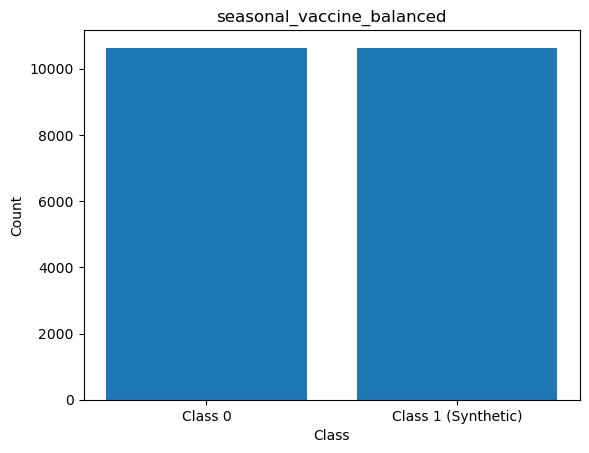

In [54]:
plt.bar(seasonal_vaccine_balanced.index, seasonal_vaccine_balanced.values)
plt.title("seasonal_vaccine_balanced")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(seasonal_vaccine_balanced.index, labels=["Class 0", "Class 1 (Synthetic)"])
plt.show()

In [55]:
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(preprocessed_train_df, y_train)
selected_features = preprocessed_train_df.columns[rfe.support_]

In [56]:
# Subset your training and test data to use only the selected features
X_train_selected = preprocessed_train_df[selected_features]
X_test_selected = preprocessed_test_df[selected_features]

clf_selected = DecisionTreeClassifier(random_state=random_seed)
clf_selected.fit(X_train_selected, y_train)
y_pred_selected = clf_selected.predict(X_test_selected)
result = classification_report(y_test, y_pred_selected)
print(result)

              precision    recall  f1-score   support

           0       0.60      0.50      0.55      2678
           1       0.52      0.61      0.56      2328

    accuracy                           0.55      5006
   macro avg       0.56      0.56      0.55      5006
weighted avg       0.56      0.55      0.55      5006



<Figure size 1000x600 with 0 Axes>

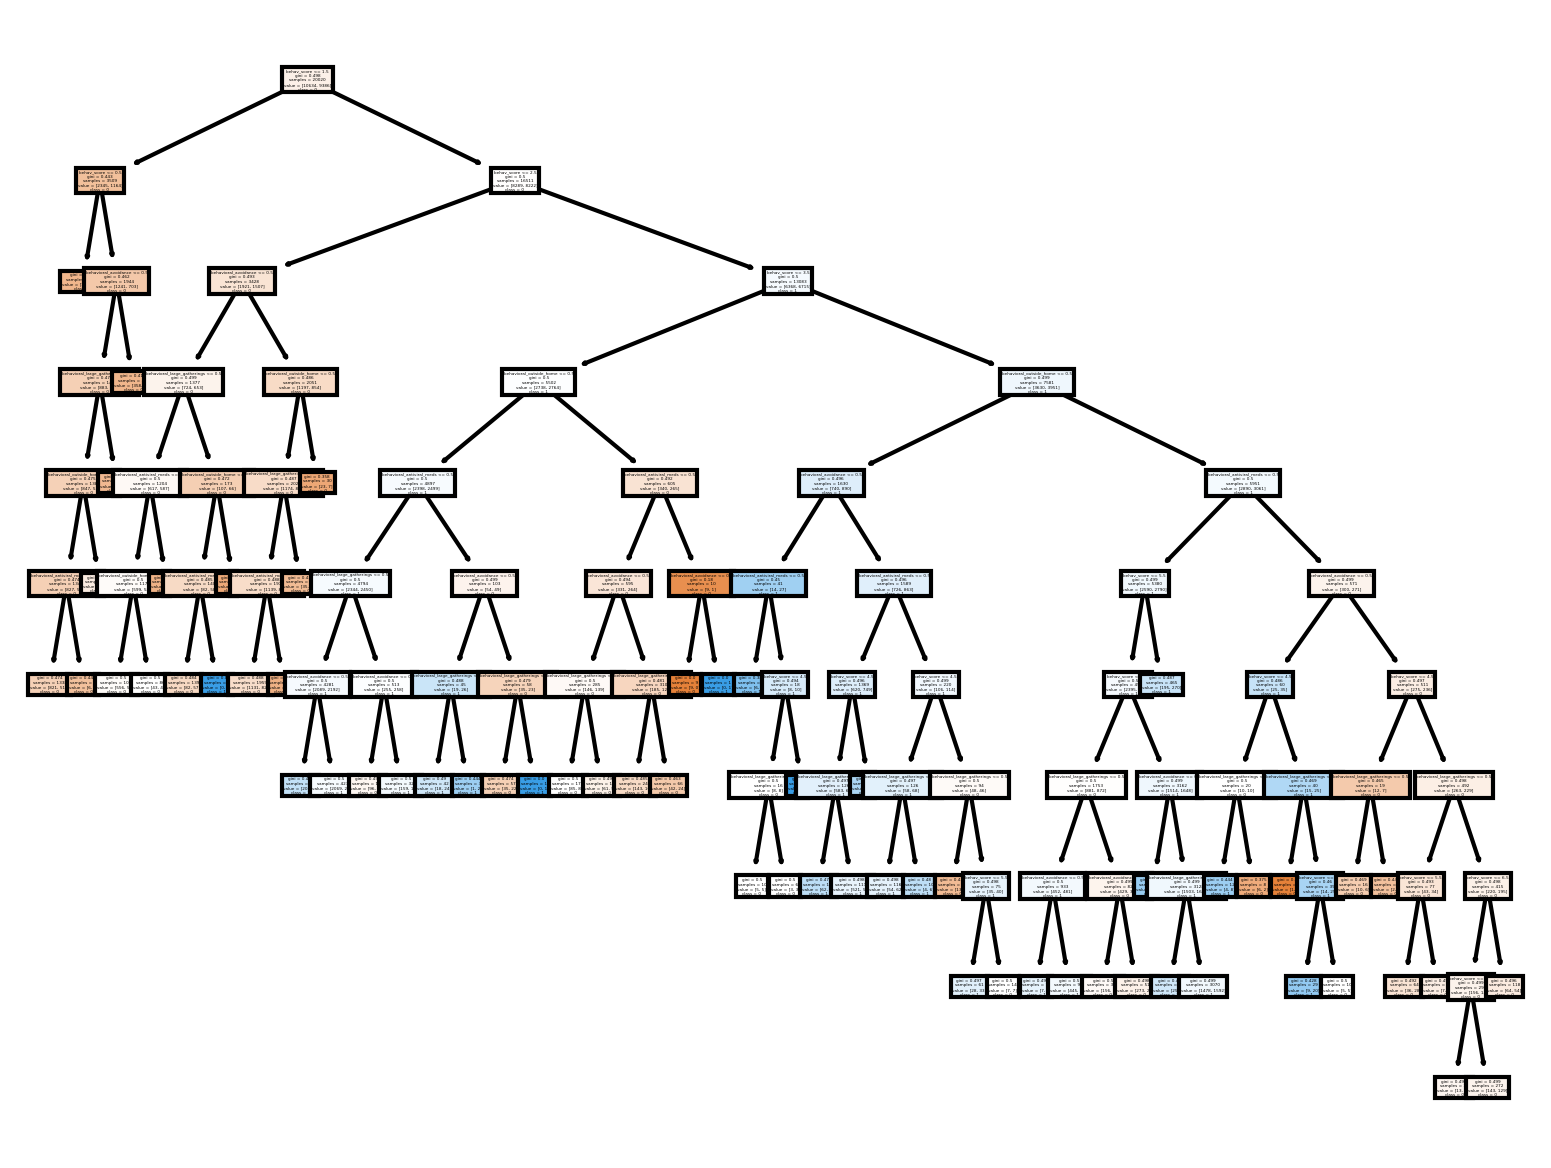

In [57]:
# Plot the decision tree for the selected feature classifier
plt.figure(figsize=(10, 6))
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=300)
tree.plot_tree(clf_selected,
              feature_names=selected_features,
              class_names=np.array(["0", "1", "seasonal_vaccine_balanced"]),
              filled=True)
plt.show()

### 7.2.1 Tree Pruning

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      2678
           1       0.67      0.76      0.71      2328

    accuracy                           0.71      5006
   macro avg       0.72      0.72      0.71      5006
weighted avg       0.72      0.71      0.71      5006



[Text(0.5555555555555556, 0.875, 'x[11] <= 4.5\ngini = 0.498\nsamples = 20020\nvalue = [10634, 9386]'),
 Text(0.3333333333333333, 0.625, 'x[23] <= 0.5\ngini = 0.436\nsamples = 12368\nvalue = [8399, 3969]'),
 Text(0.2222222222222222, 0.375, 'x[12] <= 2.5\ngini = 0.355\nsamples = 9426\nvalue = [7255, 2171]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.268\nsamples = 6912\nvalue = [5809, 1103]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.489\nsamples = 2514\nvalue = [1446, 1068]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.475\nsamples = 2942\nvalue = [1144, 1798]'),
 Text(0.7777777777777778, 0.625, 'x[23] <= 0.5\ngini = 0.414\nsamples = 7652\nvalue = [2235, 5417]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.481\nsamples = 4471\nvalue = [1799, 2672]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.237\nsamples = 3181\nvalue = [436, 2745]')]

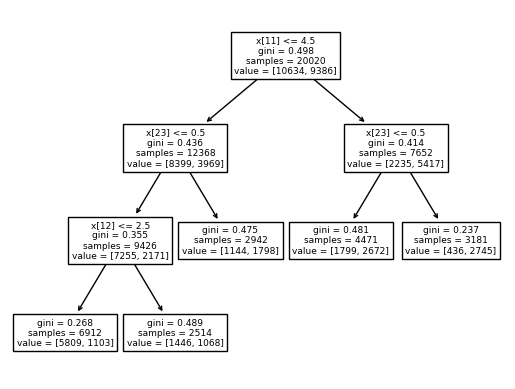

In [58]:
# Create a DecisionTreeClassifier with cost complexity pruning
clf_pruned = DecisionTreeClassifier(ccp_alpha=0.01, random_state=random_seed)
clf_pruned.fit(preprocessed_train_df, y_train)
y_pred_pruned = clf_pruned.predict(preprocessed_test_df)

# Generate classification report
class_report = classification_report(y_test, y_pred_pruned)

print("Classification Report:")
print(class_report)

# Plot the pruned tree (optional)
plot_tree(clf_pruned)

## 7.3 Ensemble methods

### 7.3.1 Random Forest

In [59]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=random_seed)

# Fit the model on the preprocessed training data
rf_classifier.fit(preprocessed_train_df, y_train)

# Predict on the preprocessed test data
y_pred_rf = rf_classifier.predict(preprocessed_test_df)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79      2678
           1       0.76      0.74      0.75      2328

    accuracy                           0.77      5006
   macro avg       0.77      0.77      0.77      5006
weighted avg       0.77      0.77      0.77      5006



In [60]:
# Calculate ROC curve and AUC
y_prob_rf = rf_classifier.predict_proba(preprocessed_test_df)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

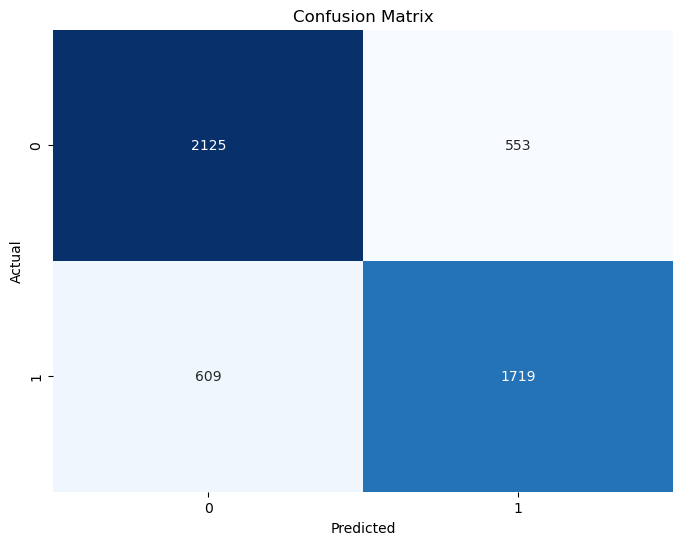

In [61]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

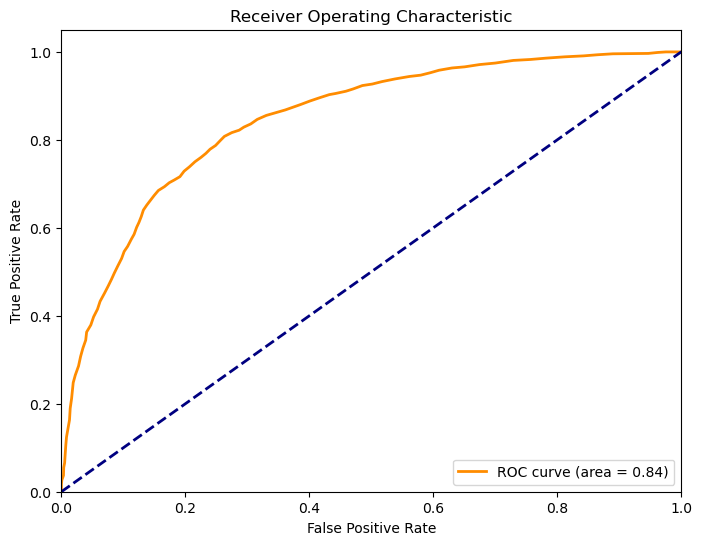

In [62]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The classification report indicates that the Random Forest classifier achieves a 77% overall accuracy in predicting vaccine acceptance. The model demonstrates balanced precision and recall values for both vaccine acceptance and non-acceptance, with precision around 76-78% and recall around 74-79%. This suggests consistent accuracy in identifying both outcomes. The F1-scores, combining precision and recall, range from 0.75 to 0.78 for both classes. In summary, the Random Forest model shows a balanced and satisfactory performance in predicting vaccine acceptance, with potential for informing public health decisions.

### 7.3.2 Adaboost Classifier & Gradient Boosting Classifier

In [63]:
a_b_c = AdaBoostClassifier(random_state=42)
g_b_c = GradientBoostingClassifier(random_state=42)

In [64]:
a_b_c.fit(X_train_selected, y_train)
g_b_c.fit(X_train_selected, y_train)

GradientBoostingClassifier(random_state=42)

In [65]:
# AdaBoost model predictions
a_b_c_train_preds = a_b_c.predict(X_train_selected)
a_b_c_test_preds = a_b_c.predict(X_test_selected)

# GradientBoosting model predictions
g_b_c_train_preds = g_b_c.predict(X_train_selected)
g_b_c_test_preds = g_b_c.predict(X_test_selected)

In [66]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, a_b_c_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, g_b_c_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, a_b_c_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, g_b_c_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.554945054945055
F1-Score: 0.5641753081588731

Model: Gradient Boosted Trees
Accuracy: 0.5568431568431569
F1-Score: 0.5590457256461232

Testing Metrics
Model: AdaBoost
Accuracy: 0.5469436675988814
F1-Score: 0.556164383561644

Model: Gradient Boosted Trees
Accuracy: 0.5515381542149421
F1-Score: 0.5530559426637468


In [67]:
a_b_c_confusion_matrix = confusion_matrix(y_test, a_b_c_test_preds)
a_b_c_confusion_matrix

array([[1317, 1361],
       [ 907, 1421]])

In [68]:
g_b_c_confusion_matrix = confusion_matrix(y_test, g_b_c_test_preds)
g_b_c_confusion_matrix

array([[1372, 1306],
       [ 939, 1389]])

In [69]:
a_b_c_classification_report = classification_report(y_test, a_b_c_test_preds)
print(a_b_c_classification_report)

              precision    recall  f1-score   support

           0       0.59      0.49      0.54      2678
           1       0.51      0.61      0.56      2328

    accuracy                           0.55      5006
   macro avg       0.55      0.55      0.55      5006
weighted avg       0.55      0.55      0.55      5006



In [70]:
g_b_c_classification_report = classification_report(y_test, g_b_c_test_preds)
print(g_b_c_classification_report)

              precision    recall  f1-score   support

           0       0.59      0.51      0.55      2678
           1       0.52      0.60      0.55      2328

    accuracy                           0.55      5006
   macro avg       0.55      0.55      0.55      5006
weighted avg       0.56      0.55      0.55      5006



### 7.3.3 GridSearchCV

In [71]:
dtc_cv_score = cross_val_score(clf_selected, X_train_selected, y_train, cv=5)
mean_dtc_cv_score = np.mean(dtc_cv_score)

print(f"Mean Cross Validation Score: {mean_dtc_cv_score :.2%}")

Mean Cross Validation Score: 55.19%


In [72]:
dtc_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None,5, 10, 20, 30, 40],
    "min_samples_split": [10, 15, 20],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6],
}

In [73]:
dtc_grid_search = GridSearchCV(clf_selected, dtc_param_grid, cv=5, return_train_score=True)

# Fit to the data
dtc_grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=319),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 15, 20]},
             return_train_score=True)

In [74]:
dtc_gs_training_score = np.mean(dtc_grid_search.cv_results_["mean_train_score"])

# Mean test score
dtc_gs_testing_score = dtc_grid_search.score(X_test_selected, y_test)

print(f"Mean Training Score: {dtc_gs_training_score :.2%}")
print(f"Mean Test Score: {dtc_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dtc_grid_search.best_params_

Mean Training Score: 55.75%
Mean Test Score: 55.21%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 20}

In [75]:
mean_rf_cv_score = np.mean(cross_val_score(rf_classifier, X_train_selected, y_train, cv=5))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 55.10%


In [76]:
rf_param_grid = {
    "n_estimators": [10, 30, 100],
    "criterion": ["gini", "entropy"],
    "max_depth": [None,5, 10, 20, 30],
    "min_samples_split": [10, 15, 20],
    "min_samples_leaf": [1,2,3,4],
}

In [ ]:
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=3)
rf_grid_search.fit(X_train_selected, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

In [ ]:
dtc_score = dtc_grid_search.score(X_test_selected, y_test)
rf_score = rf_grid_search.score(X_test_selected, y_test)

print("Decision tree grid search: ", dtc_score)
print("Random forest grid search: ", rf_score)

### 7.3.4 Bagging classifier

In [ ]:
bc =  BaggingClassifier(DecisionTreeClassifier(), n_estimators=20)
bc.fit(X_train_selected, y_train)
bc.score(X_train_selected, y_train), bc.score(X_test_selected, y_test)

In [ ]:
bc =  BaggingClassifier(DecisionTreeClassifier(max_depth = 20), n_estimators=20)
bc.fit(X_train_selected, y_train)
bc.score(X_train_selected, y_train), bc.score(X_test_selected, y_test)

### 7.3.5 xg boost

In [ ]:
# Perform one-hot encoding on categorical variables with drop="first"
preprocessed_train_df_encoded = pd.get_dummies(preprocessed_train_df, drop_first=True)
preprocessed_test_df_encoded = pd.get_dummies(preprocessed_test_df, drop_first=True)

# Ensure both encoded DataFrames have the same columns
common_columns = set(preprocessed_train_df_encoded.columns) & set(preprocessed_test_df_encoded.columns)
preprocessed_train_df_encoded = preprocessed_train_df_encoded[common_columns]
preprocessed_test_df_encoded = preprocessed_test_df_encoded[common_columns]

# Convert feature names to strings and remove problematic characters
clean_feature_names = [str(col).replace('[', '').replace(']', '').replace('<', '') for col in preprocessed_train_df_encoded.columns]

# Assign clean feature names to the encoded DataFrames
preprocessed_train_df_encoded.columns = clean_feature_names
preprocessed_test_df_encoded.columns = clean_feature_names

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=random_seed)

# Fit the classifier on the preprocessed training data
xgb_classifier.fit(preprocessed_train_df_encoded, y_train)

# Predict on the preprocessed test data
y_pred_xgb = xgb_classifier.predict(preprocessed_test_df_encoded)

# Evaluate the model
print(classification_report(y_test, y_pred_xgb))

XGBoost model shows balanced performance in terms of precision, recall, and F1-score for both classes. The model is slightly better at identifying the "Not Vaccinated" class, as indicated by the higher precision and recall for that class. The overall accuracy of 77% suggests that the model is performing reasonably well in predicting whether an individual has been vaccinated or not. 

## 7.4 KNN

In [ ]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform a grid search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(preprocessed_train_df, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(preprocessed_test_df)

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred_knn))
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 7.5 Naive Bayes

In [ ]:
# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier on the preprocessed training data
nb_classifier.fit(preprocessed_train_df, y_train)

# Predict on the preprocessed test data
y_pred_nb = nb_classifier.predict(preprocessed_test_df)

# Calculate predicted probabilities for ROC curve
y_probs_nb = nb_classifier.predict_proba(preprocessed_test_df)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_nb)
roc_auc = roc_auc_score(y_test, y_probs_nb)

# Evaluate the model
print(classification_report(y_test, y_pred_nb))


In [ ]:
 # Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

The Naive Bayes classifier demonstrated a balanced performance on the test dataset. It exhibited relatively good precision for classifying individuals who did not get vaccinated (0.81) and satisfactory precision for those who did (0.67). It effectively identified a significant proportion of vaccinated individuals (recall of 0.82) while maintaining reasonable recall for non-vaccinated individuals (0.65). The F1-scores for both classes were comparable (0.72 for non-vaccinated and 0.74 for vaccinated), indicating a harmonious trade-off between precision and recall. The model achieved an overall accuracy of 73%, effectively predicting the vaccination status for the majority of instances. The macro and weighted averages suggest consistent performance across the classes.

## Data Evaluation

## Conclusion

## Recomendation